In [ ]:
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns
#from pandas_ods_reader import read_ods

#BÁSICAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import seaborn as sns

#STATSMODELS
#!pip install statsmodels --upgrade 
from sklearn.metrics import r2_score
import statsmodels.api as sm

#PANDAS PROFILING
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 
from pandas_profiling import ProfileReport

#METRICS
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#MODELAGEM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Pycaret

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pycaret-ts-alpha

     |████████████████████████████████| 476 kB 5.0 MB/s 
     |████████████████████████████████| 1.4 MB 42.1 MB/s 
     |████████████████████████████████| 23.9 MB 13 kB/s 
     |████████████████████████████████| 1.7 MB 21.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 113 kB 67.9 MB/s 
     |████████████████████████████████| 6.1 MB 18.6 MB/s 
     |████████████████████████████████| 1.3 MB 49.5 MB/s 
     |████████████████████████████████| 16.9 MB 43 kB/s 
     |████████████████████████████████| 22.3 MB 27 kB/s 
     |████████████████████████████████| 167 kB 69.1 MB/s 
     |████████████████████████████████| 2.0 MB 65.4 MB/s 
     |████████████████████████████████| 261 kB 73.5 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
     |████████████████████████████████| 86 kB 5.4 MB/s 
     |█████████████████████

In [ ]:
import pandas as pd
import os

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
from pprint import pprint
from pycaret.internal.pycaret_experiment import TimeSeriesExperiment
from sktime.utils.plotting import plot_series

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
df_ts = pd.read_csv('/content/drive/MyDrive/TCC_Entrega/microdados_anac/microdados_Anac_2014a2019.csv')

In [ ]:
#df_ts = pd.read_csv('/content/drive/MyDrive/TCC_Entrega/microdados_anac/microdados_Anac_2014a2019.csv', index_col='nr_ano_mes_chegada_real')

In [ ]:
#df_ts = pd.read_csv('/content/drive/MyDrive/TCC_Entrega/microdados_anac/microdados_Anac_2014a2019.csv', sep = ",", index_col='nr_ano_mes_chegada_real', error_bad_lines=False, encoding = 'unicode_escape')

In [ ]:
#df_ts.query('nr_ano_mes_chegada_real >= "2014-01" & nr_ano_mes_chegada_real <= "2019-12"')

In [ ]:
df_ts.set_index('nr_ano_mes_chegada_real', inplace=True)
#df_ts.set_index('nr_ano_mes_chegada_real', drop= True, inplace=True)

In [ ]:
df_ts.index = pd.to_datetime(df_ts.index)

In [ ]:
df_ts.index = pd.date_range('2014-01-01', periods=72, freq='M')

In [ ]:
#df_ts.head(72)

In [ ]:
df_ts.head()

,qtde_chegadas
2014-01-31,5025
2014-02-28,5187
2014-03-31,5413
2014-04-30,5449
2014-05-31,5468


In [ ]:
df_ts.tail()

,qtde_chegadas
2019-08-31,5884
2019-09-30,5908
2019-10-31,6025
2019-11-30,6141
2019-12-31,6887


In [ ]:
df_ts.dtypes

qtde_chegadas    int64
dtype: object

In [ ]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2014-01-31 to 2019-12-31
Freq: M
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   qtde_chegadas  72 non-null     int64
dtypes: int64(1)
memory usage: 1.1 KB


In [ ]:
df_ts.shape

(72, 1)

In [ ]:
df_ts.describe()

,qtde_chegadas
count,72.000000
mean,5541.541667
std,404.262184
min,4828.000000
25%,5306.500000
50%,5489.500000
75%,5768.000000
max,6887.000000


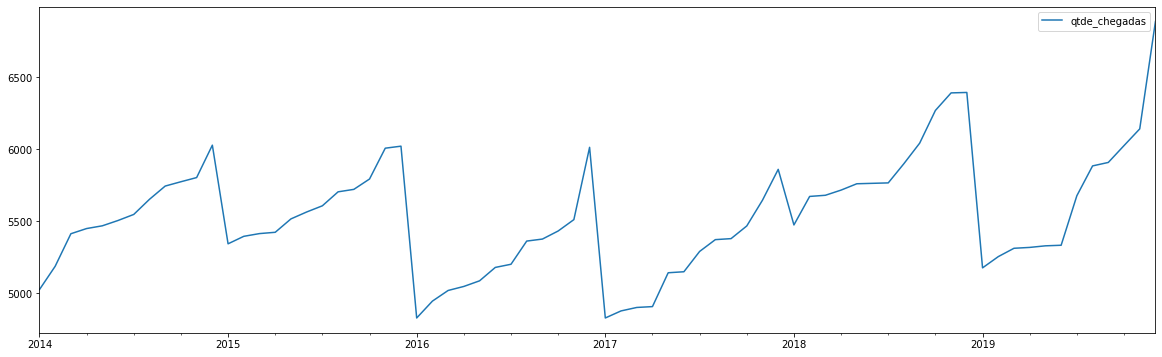

In [ ]:
df_ts.plot(figsize=(20,6));

#Aplicando Auto Time Series

In [ ]:
exp = TimeSeriesExperiment()
exp.setup(df_ts, fh=12, fold=3, session_id=42);

,Description,Value
0,session_id,42
1,Original Data,"(72, 1)"
2,Missing Values,False
3,Transformed Train Set,"(60,)"
4,Transformed Test Set,"(12,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,3
7,Enforce Prediction Interval,False
8,Seasonal Period Tested,12
9,Seasonality Detected,True


In [ ]:
exp.models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend.PolynomialTrendForeca...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
ets,ETS,sktime.forecasting.ets.AutoETS,True
theta,Theta Forecaster,sktime.forecasting.theta.ThetaForecaster,True
tbats,TBATS,sktime.forecasting.tbats.TBATS,False


In [ ]:
#melhores_modelos_3 = exp.compare_models(exclude=['auto_arima'], n_select=3, turbo=False)

melhores_modelos_3 = exp.compare_models(n_select=3, turbo=False)

,Model,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
tbats,TBATS,360.385,376.942,0.0649,0.066,-1.1258,20.5933
snaive,Seasonal Naive Forecaster,370.972,386.759,0.0665,0.0679,-1.3968,0.0167
bats,BATS,382.41,393.632,0.069,0.0702,-1.1805,5.8033
exp_smooth,Exponential Smoothing,419.462,428.823,0.0765,0.0767,-1.2903,0.1167
theta,Theta Forecaster,424.057,434.873,0.0767,0.0778,-1.573,0.0200
arima,ARIMA,458.954,478.144,0.082,0.0847,-2.4515,0.0600
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Det...,495.593,611.855,0.0944,0.0888,-3.3855,0.0533
prophet,Prophet,503.106,523.969,0.0921,0.0909,-2.8956,1.3800
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,530.794,649.395,0.1002,0.0952,-3.7749,1.0067
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,533.806,627.065,0.1001,0.0961,-3.5106,0.9467


In [ ]:
melhores_modelos_3

[TBATS(box_cox_bounds=(0, 1), context=None, multiprocessing_start_method='spawn',
       n_jobs=None, show_warnings=False, sp=12, use_arma_errors=True,
       use_box_cox=True, use_damped_trend=None, use_trend=None),
 NaiveForecaster(sp=12, strategy='last', window_length=None),
 BATS(box_cox_bounds=(0, 1), context=None, multiprocessing_start_method='spawn',
      n_jobs=None, show_warnings=False, sp=12, use_arma_errors=True,
      use_box_cox=True, use_damped_trend=None, use_trend=None)]

#Avaliando os modelos separadamente

In [ ]:
#Modelo TBATS

modelo = exp.create_model("tbats")
modelo

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,2015-12,353.9232,370.4909,0.0685,0.0660,-0.4815
1,2016-12,104.0835,128.3718,0.0205,0.0202,0.8331
2,2017-12,623.1498,631.9626,0.1056,0.1117,-3.7290
Mean,NaN,360.3855,376.9418,0.0649,0.0660,-1.1258
SD,NaN,211.9572,205.6407,0.0348,0.0374,1.9174


TBATS(box_cox_bounds=(0, 1), context=None, multiprocessing_start_method='spawn',
      n_jobs=None, show_warnings=False, sp=12, use_arma_errors=True,
      use_box_cox=True, use_damped_trend=None, use_trend=None)

In [ ]:
#Modelo SNAIVE

modelo1 = exp.create_model('snaive')
modelo1

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,2015-12,375.7500,395.3350,0.0728,0.0700,-0.6868
1,2016-12,69.7500,88.0686,0.0132,0.0132,0.9215
2,2017-12,667.4167,676.8738,0.1134,0.1204,-4.4251
Mean,NaN,370.9722,386.7591,0.0665,0.0679,-1.3968
SD,NaN,244.0198,240.4552,0.0411,0.0438,2.2397


NaiveForecaster(sp=12, strategy='last', window_length=None)

In [ ]:
#Modelo BATS

modelo2 = exp.create_model('bats')
modelo2

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,2015-12,319.7088,333.3684,0.0618,0.0598,-0.1995
1,2016-12,189.1870,202.4919,0.0367,0.0360,0.5847
2,2017-12,638.3338,645.0356,0.1083,0.1147,-3.9267
Mean,NaN,382.4099,393.6319,0.0690,0.0702,-1.1805
SD,NaN,188.6474,185.6251,0.0297,0.0330,1.9681


BATS(box_cox_bounds=(0, 1), context=None, multiprocessing_start_method='spawn',
     n_jobs=None, show_warnings=False, sp=12, use_arma_errors=True,
     use_box_cox=True, use_damped_trend=None, use_trend=None)

In [ ]:
#Definindo as variáveis de treino e de teste (ou validação).

y_treino = exp.get_config("y_train")
y_teste = exp.get_config("y_test")

In [ ]:
#y_treino.set_index('nr_ano_mes_chegada_real', inplace=True)
#y_treino = pd.to_datetime(y_treino)

In [ ]:
y_treino.head()

2014-01    5025
2014-02    5187
2014-03    5413
2014-04    5449
2014-05    5468
Freq: M, Name: qtde_chegadas, dtype: int64

In [ ]:
#y_predito.head()

NameError: ignored

#Gerando as previsões

In [ ]:
#Gerando as previsões do modelo TBATS

#TBATS = modelo
#SNAIVE = modelo1
#BATS = modelo2

y_predito = exp.predict_model(modelo)

,Model,MAE,RMSE,MAPE,SMAPE,R2
0,TBATS,326.5892,358.5372,0.0587,0.057,0.4543


In [ ]:
#Plotando as previsões, a série de validação e os dados de treino.

plot_series(df_ts['qtde_chegadas'], y_treino, y_predito, labels=['Série completa', 'Treino', 'Previsões']);

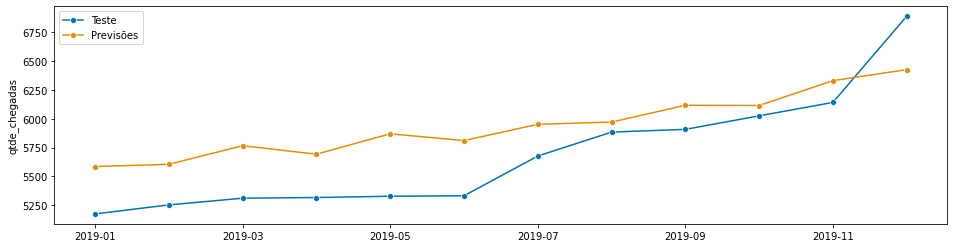

In [ ]:
#Plotando os dados de validação e as previsões.

plot_series(y_teste, y_predito, labels=['Teste', 'Previsões']);

In [ ]:
#Gerando as previsões do modelo SNAIVE

#TBATS = modelo
#SNAIVE = modelo1
#BATS = modelo2

y_predito1 = exp.predict_model(modelo1)

,Model,MAE,RMSE,MAPE,SMAPE,R2
0,Naive Forecaster,297.4167,331.5664,0.0531,0.0518,0.5333


In [ ]:
#Plotando as previsões, a série de validação e os dados de treino.

plot_series(df_ts['qtde_chegadas'], y_treino, y_predito1, labels=['Série completa', 'Treino', 'Previsões']);

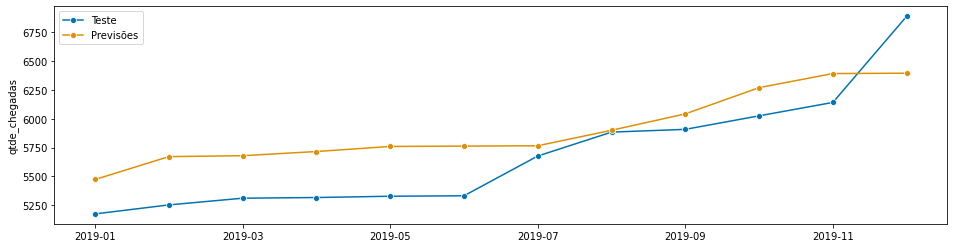

In [ ]:
#Plotando os dados de validação e as previsões.

plot_series(y_teste, y_predito1, labels=['Teste', 'Previsões']);

In [ ]:
#Gerando as previsões do modelo BATS

#TBATS = modelo
#SNAIVE = modelo1
#BATS = modelo2

y_predito2 = exp.predict_model(modelo2)

,Model,MAE,RMSE,MAPE,SMAPE,R2
0,BATS,254.4665,297.9697,0.0456,0.0447,0.6231


In [ ]:
#Plotando as previsões, a série de validação e os dados de treino.

plot_series(df_ts['qtde_chegadas'], y_treino, y_predito2, labels=['Série completa', 'Treino', 'Previsões']);

TypeError: ignored

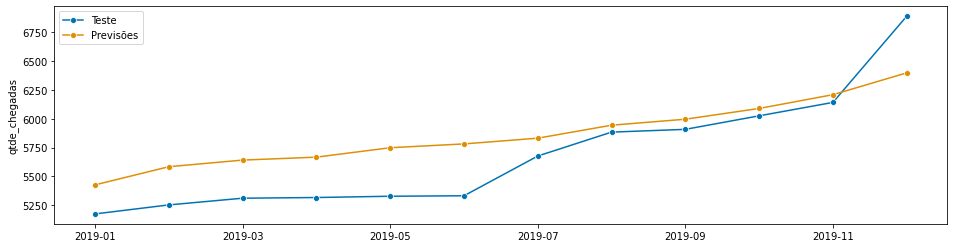

In [ ]:
#Plotando os dados de validação e as previsões.

plot_series(y_teste, y_predito2, labels=['Teste', 'Previsões']);

#Realizando o Tunning do modelo

In [ ]:
#Tunning TBATS
modelo_tunado = exp.tune_model(modelo)

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,2015-12,353.9232,370.4909,0.0685,0.0660,-0.4815
1,2016-12,60.8729,76.7826,0.0117,0.0117,0.9403
2,2017-12,574.1601,583.4714,0.0974,0.1025,-3.0312
Mean,NaN,329.6521,343.5816,0.0592,0.0601,-0.8574
SD,NaN,210.2503,207.7281,0.0356,0.0373,1.6430


In [ ]:
print(modelo)
print(modelo_tunado)

TBATS(box_cox_bounds=(0, 1), context=None, multiprocessing_start_method='spawn',
      n_jobs=None, show_warnings=False, sp=12, use_arma_errors=True,
      use_box_cox=True, use_damped_trend=None, use_trend=None)
TBATS(box_cox_bounds=(0, 1), context=None, multiprocessing_start_method='spawn',
      n_jobs=None, show_warnings=False, sp=12, use_arma_errors=True,
      use_box_cox=True, use_damped_trend=False, use_trend=True)


Em comparação com o modelo anterior, não houve melhoras significativas.

Comparando o modelo antes e depois do tunning, observa-se que as mudanças que ocorreram foram nos parâmetros use_damped_trend e use_trend, que antes eram None e depois True.



In [ ]:
#Tunning SNAIVE

modelo_tunado1 = exp.tune_model(modelo1)

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,2015-12,408.6042,454.6440,0.0795,0.0761,-1.2309
1,2016-12,332.8704,395.5353,0.0656,0.0630,-0.5844
2,2017-12,487.2500,567.3310,0.0804,0.0849,-2.8112
Mean,NaN,409.5748,472.5034,0.0752,0.0747,-1.5422
SD,NaN,63.0290,71.2632,0.0068,0.0090,0.9354


In [ ]:
print(modelo1)
print(modelo_tunado1)

NaiveForecaster(sp=12, strategy='last', window_length=None)
NaiveForecaster(sp=1, strategy='mean', window_length=None)


Em relação ao SNAIVE anterior, as métricas de avaliação do modelo tunado foram piores.

Comparando os modelos, vemos que o tunning trouxe parâmetros diferentes do SNAIVE anterior.


In [ ]:
#Tunning BATS

modelo_tunado2 = exp.tune_model(modelo2)

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,2015-12,319.7088,333.3684,0.0618,0.0598,-0.1995
1,2016-12,189.1870,202.4919,0.0367,0.0360,0.5847
2,2017-12,638.3338,645.0356,0.1083,0.1147,-3.9267
Mean,NaN,382.4099,393.6319,0.0690,0.0702,-1.1805
SD,NaN,188.6474,185.6251,0.0297,0.0330,1.9681


In [ ]:
print(modelo2)
print(modelo_tunado2)

BATS(box_cox_bounds=(0, 1), context=None, multiprocessing_start_method='spawn',
     n_jobs=None, show_warnings=False, sp=12, use_arma_errors=True,
     use_box_cox=True, use_damped_trend=None, use_trend=None)
BATS(box_cox_bounds=(0, 1), context=None, multiprocessing_start_method='spawn',
     n_jobs=None, show_warnings=False, sp=12, use_arma_errors=True,
     use_box_cox=True, use_damped_trend=True, use_trend=False)


Em comparação com o modelo anterior, não houve melhoras significativas.

Comparando o modelo antes e depois do tunning, observa-se que as mudanças que ocorreram foram nos parâmetros use_damped_trend e use_trend, que antes eram None e depois True e False, respectivamente.

#Para esses novos modelos, serão geradas novas previsões.

In [ ]:
#TBATS

y_predito_tunado = exp.predict_model(modelo_tunado)

,Model,MAE,RMSE,MAPE,SMAPE,R2
0,TBATS,451.7242,472.58,0.0816,0.0781,0.052


In [ ]:
#Série com os valores de treino, validação e previsões.

plot_series(df_ts['qtde_chegadas'], y_treino, y_predito_tunado, labels=['Série completa', 'Treino', 'Previsões 2']);

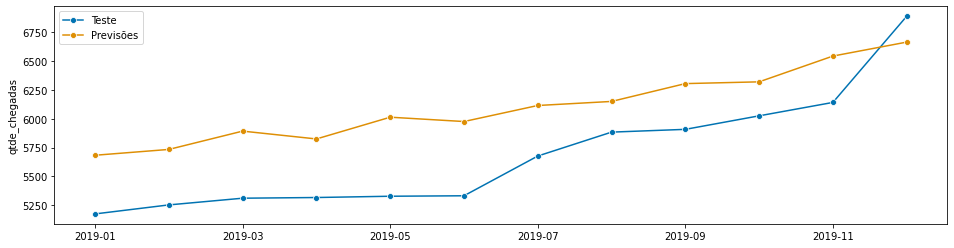

In [ ]:
#Previsões e dados de validação (valores reais).

plot_series(y_teste, y_predito_tunado, labels=['Teste', 'Previsões']);


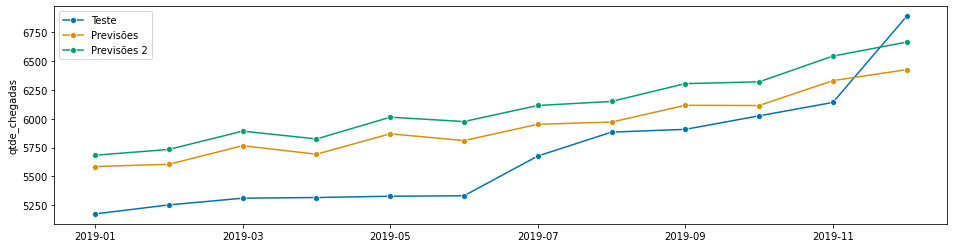

In [ ]:
#Comparando os dados de validação com as previsões do modelo original e o tunado.

plot_series(y_teste, y_predito,y_predito_tunado, labels=['Teste', 'Previsões','Previsões 2']);

In [ ]:
#SNAIVE

y_predito_tunado1 = exp.predict_model(modelo_tunado1)

,Model,MAE,RMSE,MAPE,SMAPE,R2
0,Naive Forecaster,400.0,515.8002,0.0669,0.0694,-0.1293


In [ ]:
#Série com os valores de treino, validação e previsões.

plot_series(df_ts['qtde_chegadas'], y_treino, y_predito_tunado1, labels=['Série completa', 'Treino', 'Previsões 2']);

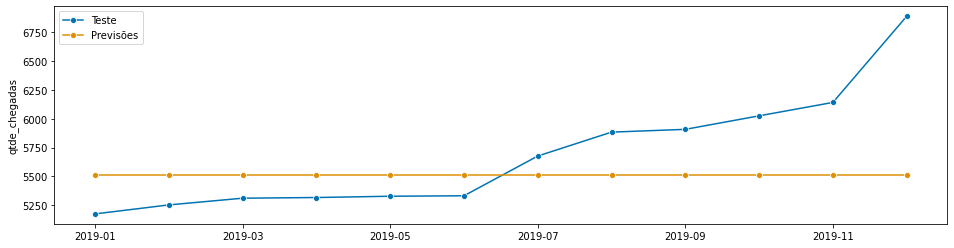

In [ ]:
#Previsões e dados de validação (valores reais).

plot_series(y_teste, y_predito_tunado1, labels=['Teste', 'Previsões']);


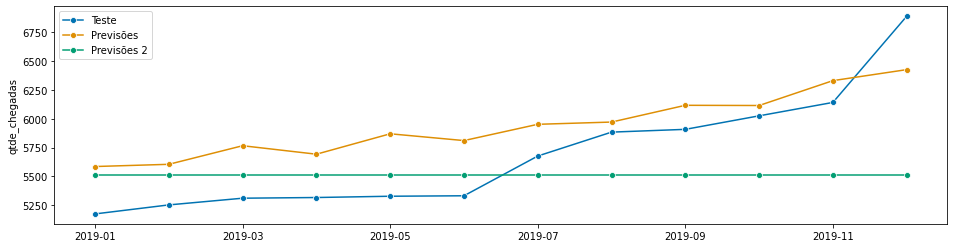

In [ ]:
#Comparando os dados de validação com as previsões do modelo original e o tunado.

plot_series(y_teste, y_predito,y_predito_tunado1, labels=['Teste', 'Previsões','Previsões 2']);

In [ ]:
#BATS

y_predito_tunado2 = exp.predict_model(modelo_tunado2)

,Model,MAE,RMSE,MAPE,SMAPE,R2
0,BATS,254.4665,297.9697,0.0456,0.0447,0.6231


In [ ]:
#Série com os valores de treino, validação e previsões.

plot_series(df_ts['qtde_chegadas'], y_treino, y_predito_tunado2, labels=['Série completa', 'Treino', 'Previsões 2']);

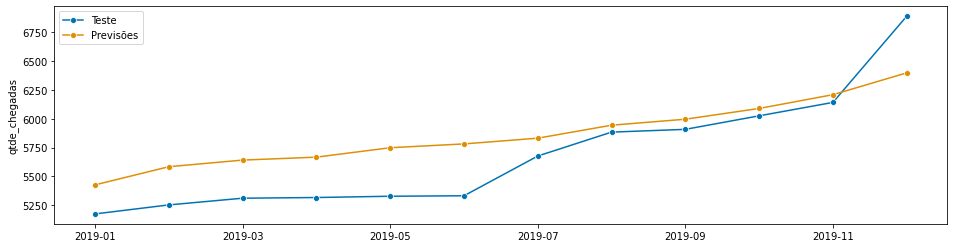

In [ ]:
#Previsões e dados de validação (valores reais).

plot_series(y_teste, y_predito_tunado2, labels=['Teste', 'Previsões']);


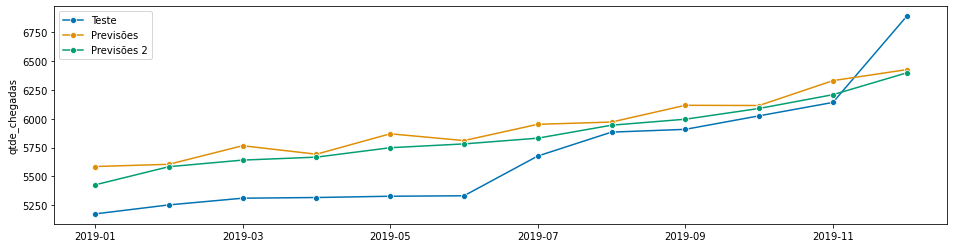

In [ ]:
#Comparando os dados de validação com as previsões do modelo original e o tunado.

plot_series(y_teste, y_predito,y_predito_tunado2, labels=['Teste', 'Previsões','Previsões 2']);

#Combinando modelos

In [ ]:
#Caso um modelo individualmente não seja satisfatório, é possível realizar a combinação de modelos. 
#Serão combinados o primeiro melhor modelo e o segundo melhor (TBATS e SNAIVE).

modelo_blend = exp.blend_models(melhores_modelos_3[0:2])

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,2015-12,364.1700,381.9507,0.0706,0.0679,-0.5745
1,2016-12,65.8789,88.4498,0.0130,0.0128,0.9208
2,2017-12,645.2832,653.7290,0.1095,0.1160,-4.0604
Mean,NaN,358.4440,374.7098,0.0643,0.0656,-1.2381
SD,NaN,236.5755,230.8311,0.0397,0.0422,2.0870


In [ ]:
#Gerando as previsões do modelo combinado, os resultados das métricas ficaram abaixo do modelo TBATS tunado.

y_predito_blend = exp.predict_model(modelo_blend)

,Model,MAE,RMSE,MAPE,SMAPE,R2
0,EnsembleForecaster,312.003,341.8919,0.0559,0.0544,0.5038


In [ ]:
#Renomeando a coluna que contém as previsões.

y_predito_blend.columns=['blend']

In [ ]:
#Plotando os dados de treino, validação e previsões.

plot_series(df_ts['qtde_chegadas'], y_treino, y_predito_blend['blend'], labels=['Série completa', 'Treino', 'Previsões blend']);

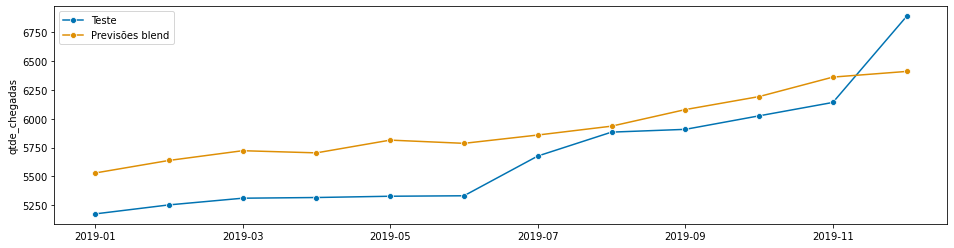

In [ ]:
#Validação e previsões.

plot_series(y_teste, y_predito_blend, labels=['Teste', 'Previsões blend']);

#Finalizando o modelo


In [ ]:
#Como o melhor modelo foi o SNAIVE tunado, então esse projeto será finalizado com esse modelo.

modelo_final = exp.finalize_model(modelo_tunado1)

In [ ]:
previsoes = exp.predict_model(modelo_final, verbose=False)

In [ ]:
plot_series(df_ts['qtde_chegadas'], previsoes, labels=['Série original','Previsões']);

In [ ]:
#Salvando o modelo
exp.save_model(modelo_final, 'melhor_modelo', model_only=True)

Transformation Pipeline and Model Successfully Saved


(NaiveForecaster(sp=1, strategy='mean', window_length=None),
 'melhor_modelo.pkl')

In [ ]:
#Carregando o modelo

modelo_carregado = exp.load_model('melhor_modelo')

Transformation Pipeline and Model Successfully Loaded


Conclusão

Projeto utilizando a biblioteca Pycaret e mostrando a sua facilidade e praticidade na modelagem de dados. Não foi necessário utilizar muitas linhas de comando e nem calcular as métricas de avaliação (feitas automaticamente).

In [ ]:
#modelo_carregado.to_csv('modelo_carregado.csv')

#Machine Learning com Pycaret para Série Temporal (Oficial)


In [ ]:
df_ts

,qtde_chegadas
2014-01-31,5025
2014-02-28,5187
2014-03-31,5413
2014-04-30,5449
2014-05-31,5468
...,...
2019-08-31,5884
2019-09-30,5908
2019-10-31,6025
2019-11-30,6141


In [ ]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2014-01-31 to 2019-12-31
Freq: M
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   qtde_chegadas  72 non-null     int64
dtypes: int64(1)
memory usage: 1.1 KB


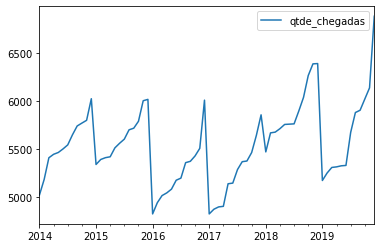

In [ ]:
#comportamento ao longo do tempo
df_ts.plot()

In [ ]:
from pycaret.time_series import *

In [ ]:
setup(df_ts, fh=12, fold=3)

,Description,Value
0,session_id,6871
1,Original Data,"(72, 1)"
2,Missing Values,False
3,Transformed Train Set,"(60,)"
4,Transformed Test Set,"(12,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,3
7,Enforce Prediction Interval,False
8,Seasonal Period Tested,12
9,Seasonality Detected,True


In [ ]:
best_model = compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
snaive,Seasonal Naive Forecaster,370.972,386.759,0.0665,0.0679,-1.3968,0.0167
exp_smooth,Exponential Smoothing,419.462,428.823,0.0765,0.0767,-1.2903,0.1100
theta,Theta Forecaster,424.057,434.873,0.0767,0.0778,-1.573,0.0200
arima,ARIMA,458.954,478.144,0.082,0.0847,-2.4515,0.0567
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Det...,490.894,614.864,0.0937,0.0879,-3.4362,0.0500
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,527.031,633.058,0.099,0.0947,-3.5937,0.9467
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,543.182,631.655,0.102,0.0979,-3.5034,0.8400
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,547.348,653.267,0.1032,0.0981,-3.8732,1.0133
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize...,550.003,607.348,0.101,0.0996,-3.4285,0.0267
polytrend,Polynomial Trend Forecaster,561.027,617.646,0.103,0.1015,-3.6187,0.0133


In [ ]:
snaive = create_model('snaive')

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,2015-12,375.7500,395.3350,0.0728,0.0700,-0.6868
1,2016-12,69.7500,88.0686,0.0132,0.0132,0.9215
2,2017-12,667.4167,676.8738,0.1134,0.1204,-4.4251
Mean,NaN,370.9722,386.7591,0.0665,0.0679,-1.3968
SD,NaN,244.0198,240.4552,0.0411,0.0438,2.2397


In [ ]:
#df_ts.shape((5,12))

In [ ]:
plot_model(snaive, plot='decomp_stl')

In [ ]:
plot_model(snaive, plot='train_test_split')

In [ ]:
final = finalize_model(snaive)

In [ ]:
final

NaiveForecaster(sp=12, strategy='last', window_length=None)

In [ ]:
plot_model(final, plot='forecast')

In [ ]:
pred = predict_model(final, fh=12)

In [ ]:
pred

2020-01    5176.0
2020-02    5254.0
2020-03    5312.0
2020-04    5318.0
2020-05    5329.0
2020-06    5333.0
2020-07    5677.0
2020-08    5884.0
2020-09    5908.0
2020-10    6025.0
2020-11    6141.0
2020-12    6887.0
Freq: M, Name: qtde_chegadas, dtype: float64

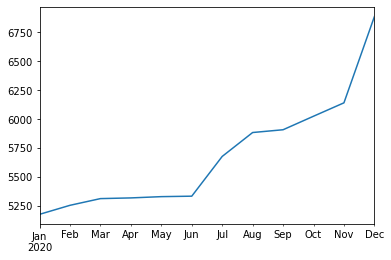

In [ ]:
pred.plot()

In [ ]:
pred.to_csv('df_20.csv')

Forecast Finalizado

In [ ]:
df_ts.set_index('nr_ano_mes_chegada_real', inplace=True)

In [ ]:
df_ts.index = pd.to_datetime(df_ts.index)

In [ ]:
df_ts.index

DatetimeIndex(['2014-02-01', '2014-04-01', '2014-11-01', '2014-05-01',
               '2014-03-01', '2014-09-01', '2014-01-01', '2014-10-01',
               '2014-08-01', '2014-06-01', '2014-12-01', '2014-07-01',
               '2015-11-01', '2015-06-01', '2015-02-01', '2015-04-01',
               '2015-09-01', '2015-05-01', '2015-10-01', '2015-03-01',
               '2015-12-01', '2015-08-01', '2015-07-01', '2015-01-01',
               '2016-11-01', '2016-06-01', '2016-04-01', '2016-09-01',
               '2016-10-01', '2016-05-01', '2016-12-01', '2016-08-01',
               '2016-03-01', '2016-02-01', '2016-07-01', '2016-01-01',
               '2017-06-01', '2017-04-01', '2017-05-01', '2017-02-01',
               '2017-09-01', '2017-03-01', '2017-11-01', '2017-10-01',
               '2017-08-01', '2017-01-01', '2017-07-01', '2017-12-01',
               '2018-06-01', '2018-11-01', '2018-04-01', '2018-05-01',
               '2018-02-01', '2018-10-01', '2018-09-01', '2018-03-01',
      

In [ ]:
df_ts.head(72)

,qtde_chegadas
nr_ano_mes_chegada_real,
2014-02-01,5025
2014-04-01,5187
2014-11-01,5413
2014-05-01,5449
2014-03-01,5468
...,...
2019-12-01,5884
2019-07-01,5908
2019-02-01,6025


In [ ]:
df_ts.index = pd.date_range('2014-01-01', periods=72, freq='M')

In [ ]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2014-01-31 to 2019-12-31
Freq: M
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   qtde_chegadas  72 non-null     int64
dtypes: int64(1)
memory usage: 1.1 KB


In [ ]:
df_ts.describe()

,qtde_chegadas
count,72.000000
mean,5541.541667
std,404.262184
min,4828.000000
25%,5306.500000
50%,5489.500000
75%,5768.000000
max,6887.000000


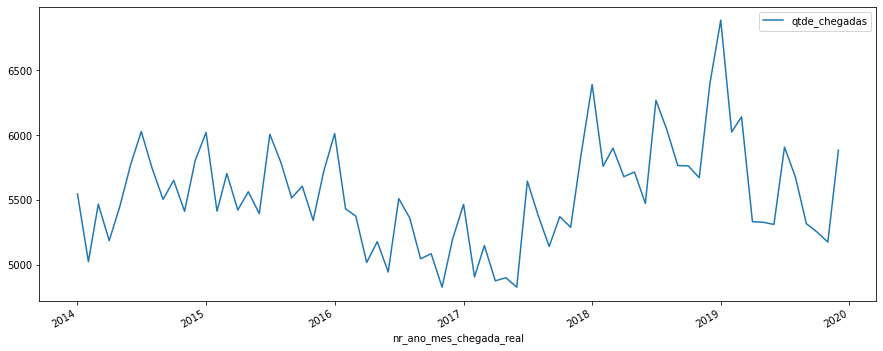

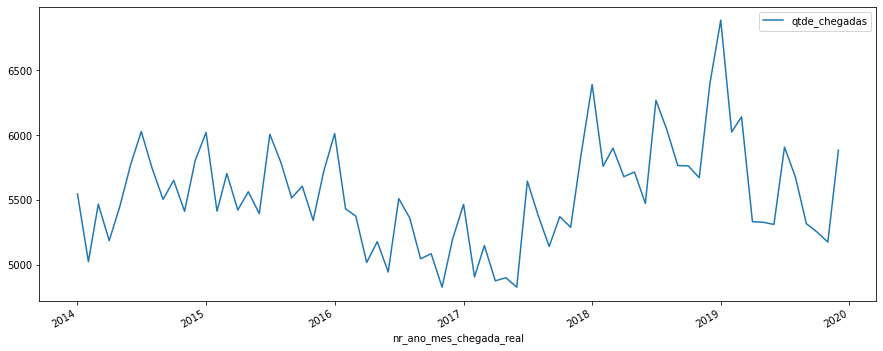

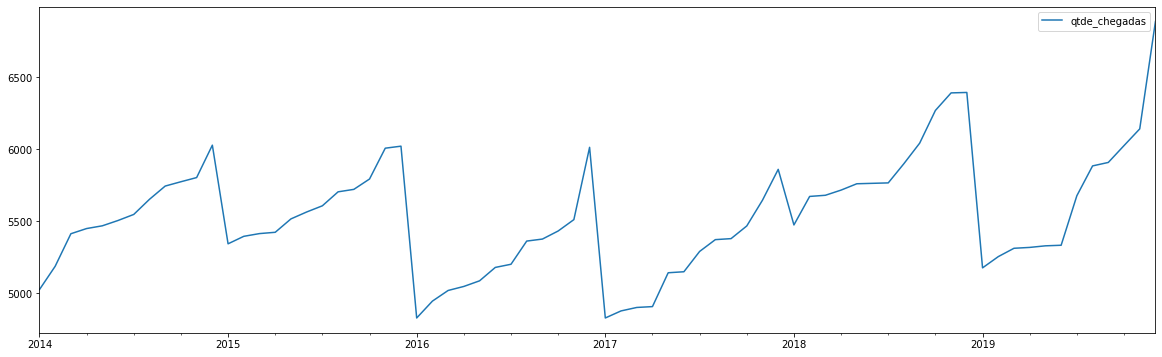

In [ ]:
df_ts.plot(figsize=(20,6));

In [ ]:
exp = TimeSeriesExperiment()
exp.setup(df_ts, fh=12, fold=3, session_id=42);

,Description,Value
0,session_id,42
1,Original Data,"(72, 1)"
2,Missing Values,False
3,Transformed Train Set,"(60,)"
4,Transformed Test Set,"(12,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,3
7,Enforce Prediction Interval,False
8,Seasonal Period Tested,12
9,Seasonality Detected,True


In [ ]:
exp.models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend.PolynomialTrendForeca...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
ets,ETS,sktime.forecasting.ets.AutoETS,True
theta,Theta Forecaster,sktime.forecasting.theta.ThetaForecaster,True
tbats,TBATS,sktime.forecasting.tbats.TBATS,False


In [ ]:
melhores_modelos_3 = exp.compare_models(exclude=['auto_arima'], n_select=3, turbo=False)

,Model,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
tbats,TBATS,360.385,376.942,0.0649,0.066,-1.1258,19.8133
snaive,Seasonal Naive Forecaster,370.972,386.759,0.0665,0.0679,-1.3968,0.0167
bats,BATS,382.41,393.632,0.069,0.0702,-1.1805,5.5567
exp_smooth,Exponential Smoothing,419.462,428.823,0.0765,0.0767,-1.2903,0.1033
theta,Theta Forecaster,424.057,434.873,0.0767,0.0778,-1.573,0.0200
arima,ARIMA,458.954,478.144,0.082,0.0847,-2.4515,0.0667
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Det...,495.593,611.855,0.0944,0.0888,-3.3855,0.0467
prophet,Prophet,503.106,523.969,0.0921,0.0909,-2.8956,1.2267
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,530.794,649.395,0.1002,0.0952,-3.7749,1.0067
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,533.806,627.065,0.1001,0.0961,-3.5106,0.9433


Avaliando os modelos

In [ ]:
#tbats
tbats = exp.create_model("tbats")
tbats

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,2015-12,353.9232,370.4909,0.0685,0.0660,-0.4815
1,2016-12,104.0835,128.3718,0.0205,0.0202,0.8331
2,2017-12,623.1498,631.9626,0.1056,0.1117,-3.7290
Mean,NaN,360.3855,376.9418,0.0649,0.0660,-1.1258
SD,NaN,211.9572,205.6407,0.0348,0.0374,1.9174


TBATS(box_cox_bounds=(0, 1), context=None, multiprocessing_start_method='spawn',
      n_jobs=None, show_warnings=False, sp=12, use_arma_errors=True,
      use_box_cox=True, use_damped_trend=None, use_trend=None)

In [ ]:
#snaive
snaive = exp.create_model("snaive")
snaive

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,2015-12,375.7500,395.3350,0.0728,0.0700,-0.6868
1,2016-12,69.7500,88.0686,0.0132,0.0132,0.9215
2,2017-12,667.4167,676.8738,0.1134,0.1204,-4.4251
Mean,NaN,370.9722,386.7591,0.0665,0.0679,-1.3968
SD,NaN,244.0198,240.4552,0.0411,0.0438,2.2397


NaiveForecaster(sp=12, strategy='last', window_length=None)

In [ ]:
#bats
bats = exp.create_model("bats")
bats

,cutoff,MAE,RMSE,MAPE,SMAPE,R2
0,2015-12,319.7088,333.3684,0.0618,0.0598,-0.1995
1,2016-12,189.1870,202.4919,0.0367,0.0360,0.5847
2,2017-12,638.3338,645.0356,0.1083,0.1147,-3.9267
Mean,NaN,382.4099,393.6319,0.0690,0.0702,-1.1805
SD,NaN,188.6474,185.6251,0.0297,0.0330,1.9681


BATS(box_cox_bounds=(0, 1), context=None, multiprocessing_start_method='spawn',
     n_jobs=None, show_warnings=False, sp=12, use_arma_errors=True,
     use_box_cox=True, use_damped_trend=None, use_trend=None)

In [ ]:
#Definindo as variáveis de treino e de teste (ou validação).
y_treino = exp.get_config("y_train")
y_teste = exp.get_config("y_test")

In [ ]:
#Gerando as previsões do modelo TBATS
y_predito = exp.predict_model(tbats)

,Model,MAE,RMSE,MAPE,SMAPE,R2
0,TBATS,326.5892,358.5372,0.0587,0.057,0.4543


In [ ]:
df_ts.dtypes

qtde_chegadas    int64
dtype: object

In [ ]:
#Plotando as previsões, a série de validação e os dados de treino.
plot_series(df_ts['qtde_chegadas'], y_treino, y_predito, labels=['Série completa', 'Treino', 'Previsões']);

KeyError: ignored